# Set-up

## Imports

In [7]:
# --- Standard library ---
from datetime import datetime

# --- Data handling and visualization ---
import pandas as pd  # Dataframe tools
from tabulate import tabulate  # Pretty printing for dataframes

import seaborn as sns  # Easier plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

## Globals

In [8]:
today = datetime.today().strftime("%Y%m%d")

# --- Visualization ---
rc_dict = {
  "savefig.dpi": 900,  # Saved figure dots-per-inch. 600 is "HD"
  "savefig.facecolor": "white",  # This, combined with transparent setting, keeps saved figs from looking like trash on dark backgrounds 
  "savefig.transparent": False,
  "figure.figsize": (14, 10),  # Default (width, height) of figure
}
plt.rcParams.update(rc_dict)

# Data preprocessing

In [12]:
# Load dataframes
df_S_ex11 = pd.read_parquet("../../results/dataframes/dataframe_EMB_ex11-Sv1.0_DK_20221111.parquet")
df_S_ex09 = pd.read_parquet("../../results/dataframes/dataframe_EMB_ex09-Sv1.0_DK_20221010.parquet")

df_S_ex11["Convex"] = [True]*len(df_S_ex11)
df_S_ex09["Convex"] = [False]*len(df_S_ex09)

df_S = pd.concat([df_S_ex11, df_S_ex09])
df_S.index = range(len(df_S))

# Figures

## ex11-S

<Figure size 1400x1000 with 0 Axes>

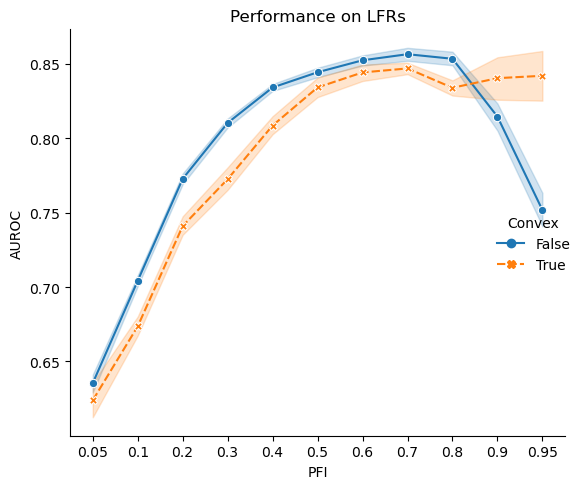

In [24]:
plt.figure()
sns.relplot(
    data=df_S, kind="line",
    x="pfi", y="AUROC",
    hue="Convex",
    style="Convex", markers=True
)

plt.title("Performance on LFRs")
plt.ylabel("AUROC")
plt.xlabel("PFI")

plt.tight_layout()
plt.savefig(f"../../results/plots/scatter_auroc-pfi_EMB_ex11-S_DK_{today}.png")

## ex11-R